# Decision Trees

In this notebook we'll use the famous [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) to check out some real decision trees!  

<img src="./data/iris.png">

This data set has:
1. 150 instances with 4 attributes (same units, all numeric)
2. Balanced class distribution
3. No missing data

In [173]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load SQLITE
import sqlite3
# Load Stats
from scipy import stats

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [174]:
# Import the data and check it out...
df_iris = pd.read_csv("./data/iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [175]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [176]:
df_iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Make a test and train split.  Note that we are using a *stratified sample* here so that we don't mess up our classifier! [More info in the docs!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [177]:
# Vectorize the whole thing...
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_iris, 
                               test_size=0.4, 
                               stratify=df_iris["species"])

In [178]:
# Check that...
train.groupby("species").size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

In [179]:
test.groupby("species").size()

species
setosa        20
versicolor    20
virginica     20
dtype: int64

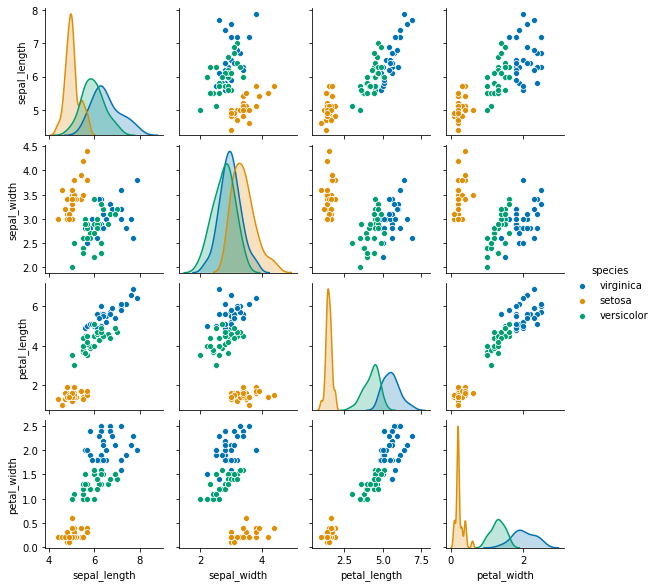

In [180]:
# Just for fun..
import seaborn as sns
sns.pairplot(train, hue="species", height=2, palette='colorblind')

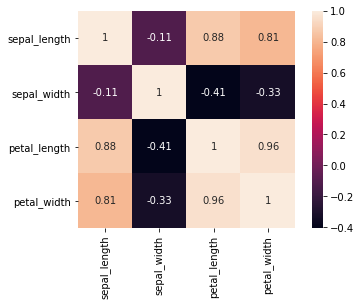

In [181]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

Now let's build a decision tree!

In [182]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [183]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
X_train = train[features]
y_train = train.species
X_test = test[features]
y_test = test.species


In [184]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)

In [185]:
# Check some measures...
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction,y_test):.3f}")
print(f"The Precision of the Decision Tree is {metrics.precision_score(prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of the Decision Tree is {metrics.recall_score(prediction,y_test,average='weighted'):.3f}")

The accuracy of the Decision Tree is 0.933
The Precision of the Decision Tree is 0.933
The Recall of the Decision Tree is 0.933


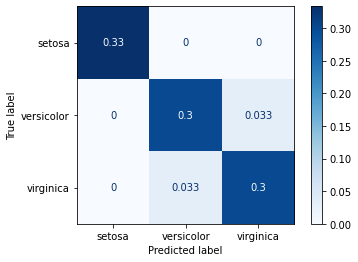

In [186]:
# Plot some graphs...
metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=mod_dt.classes_,
                                 cmap=plt.cm.Blues, normalize='all')

In [187]:
# Cooler...
mod_dt.feature_importances_


array([0.        , 0.        , 0.43062201, 0.56937799])

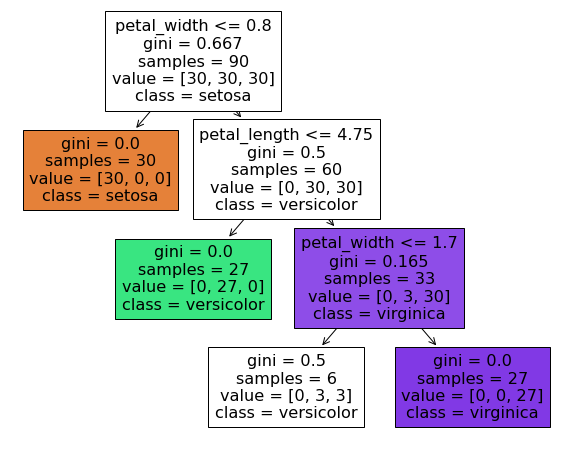

In [188]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = features, class_names = mod_dt.classes_, filled = True);

The Above only is using petal_width and petal_length... so we can plot the decision boundry..

What happens with the titanic dataset?

In [189]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic = pd.get_dummies(df_titanic, columns=['sex'])
# Be cheeky with our NAN
df_titanic = df_titanic[(df_titanic["age"].notna()) & (df_titanic["fare"].notna())]
df_titanic.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


In [191]:
train, test = train_test_split(df_titanic, 
                               test_size=0.4, 
                               stratify=df_titanic["survived"])

In [192]:
features = ["pclass", "fare", "sex_female", "age"]
X_train = train[features]
y_train = train.survived
X_test = test[features]
y_test = test.survived

In [193]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
# Check some measures...
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction,y_test):.3f}")
print(f"The Precision of the Decision Tree is {metrics.precision_score(prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of the Decision Tree is {metrics.recall_score(prediction,y_test,average='weighted'):.3f}")

The accuracy of the Decision Tree is 0.818
The Precision of the Decision Tree is 0.823
The Recall of the Decision Tree is 0.818


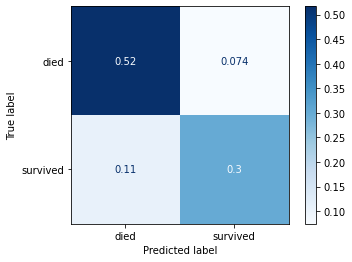

In [194]:
# Plot some graphs...
metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=["died","survived"],
                                 cmap=plt.cm.Blues, normalize='all')

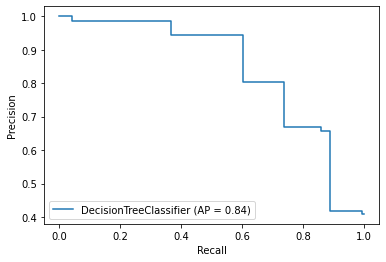

In [195]:
# Plot some graphs...
metrics.plot_precision_recall_curve(mod_dt, X_test, y_test)

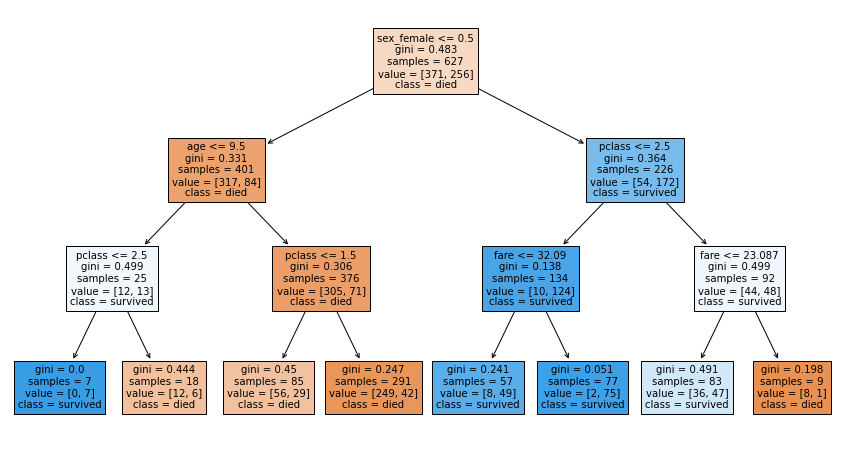

In [196]:
plt.figure(figsize = (15,8))
plot_tree(mod_dt, feature_names = features, class_names={1:"survived", 0:"died"}, filled = True);

We can also show the boundry (no plot)
<img src="./data/boundry.png">

# A Quick Note: Feature Engineering

Sometimes we can't just use the features we have, we have to create a new feature from them.  This process is called feature enginnering.

To demonstrate, let's make and try to predict some circles from just their x and y cordinates.

In [164]:
from sklearn.model_selection import train_test_split

n_points = 100
data = {"x": np.random.randint(1,100,100), "y": np.random.randint(1,100,100)}
data['r'] = [np.sqrt(x**2 + y**2) for x,y in zip(data['x'],data['y'])]
df_circles = pd.DataFrame(data)
df_circles.head()

,x,y,r
0,72,1,72.006944
1,43,71,83.006024
2,18,63,65.520989
3,78,22,81.043198
4,66,4,66.121101


<AxesSubplot:xlabel='x', ylabel='y'>

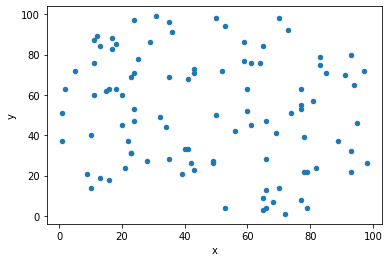

In [165]:
df_circles.plot.scatter(x='x', y='y')

In [166]:
from sklearn.linear_model import LinearRegression
# Let's use a Linear Regression to try to predict r given x and y.
X_train, X_test, y_train, y_test = train_test_split(df_circles[['x','y']], 
                                                    df_circles["r"], 
                                                    test_size=0.3)

In [168]:
reg = LinearRegression().fit(X_train, y_train)
print(f'''Model Score: {reg.score(X_train, y_train):.3f} and Validation Score: {reg.score(X_test, y_test):.3f}.''')

Model Score: 0.927 and Validation Score: 0.960.


In [169]:
reg.coef_

array([0.65052826, 0.66951371])

That's pretty good but we know the equation for a circle is $x^2 + y^2 = r^2$, so what happens if we add $x^2$ and $y^2$ to our data frame?

In [170]:
df_circles['x2'] = df_circles['x']**2
df_circles['y2'] = df_circles['y']**2
df_circles.head()

,x,y,r,x2,y2
0,72,1,72.006944,5184,1
1,43,71,83.006024,1849,5041
2,18,63,65.520989,324,3969
3,78,22,81.043198,6084,484
4,66,4,66.121101,4356,16


In [171]:
# Train and run again...
X_train, X_test, y_train, y_test = train_test_split(df_circles[['x', 'y','x2','y2']], 
                                                    df_circles["r"], 
                                                    test_size=0.3)
reg = LinearRegression().fit(X_train, y_train)
print(f'''Model Score: {reg.score(X_train, y_train):.3f} and Validation Score: {reg.score(X_test, y_test):.3f}.''')

Model Score: 0.970 and Validation Score: 0.959.


In [172]:
reg.coef_

array([0.25080079, 0.17727062, 0.00425194, 0.00525897])